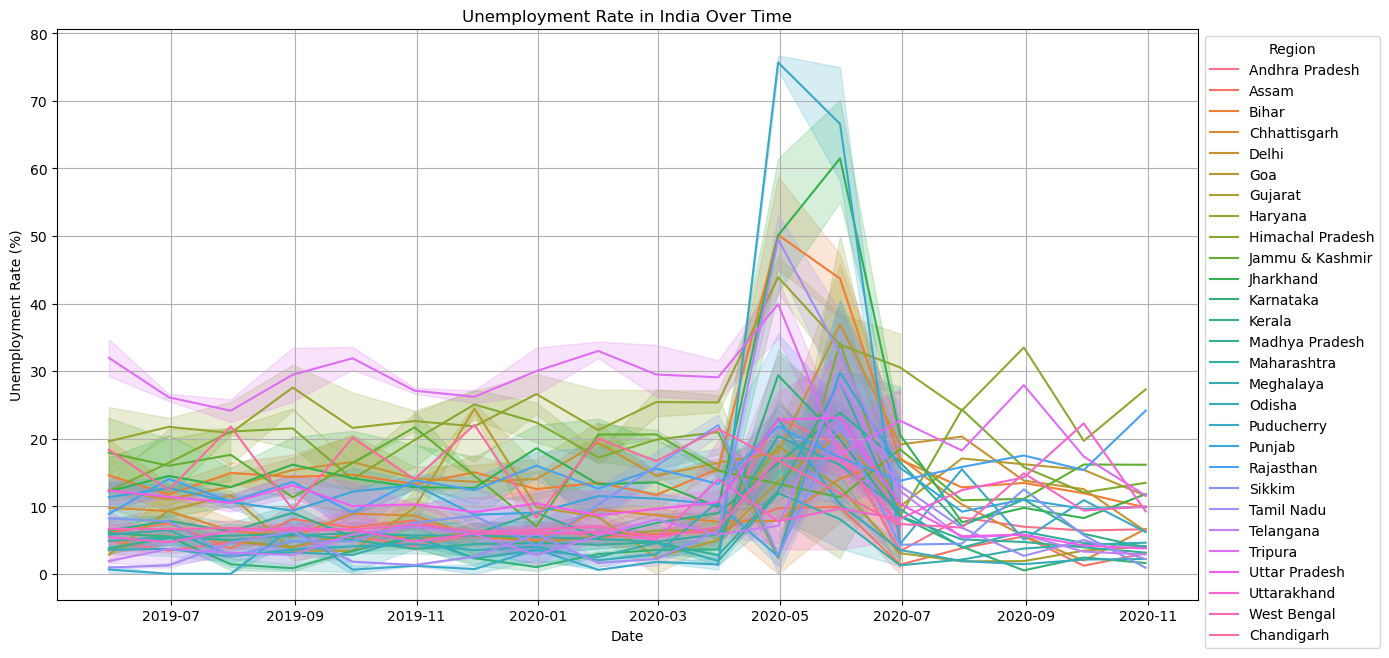

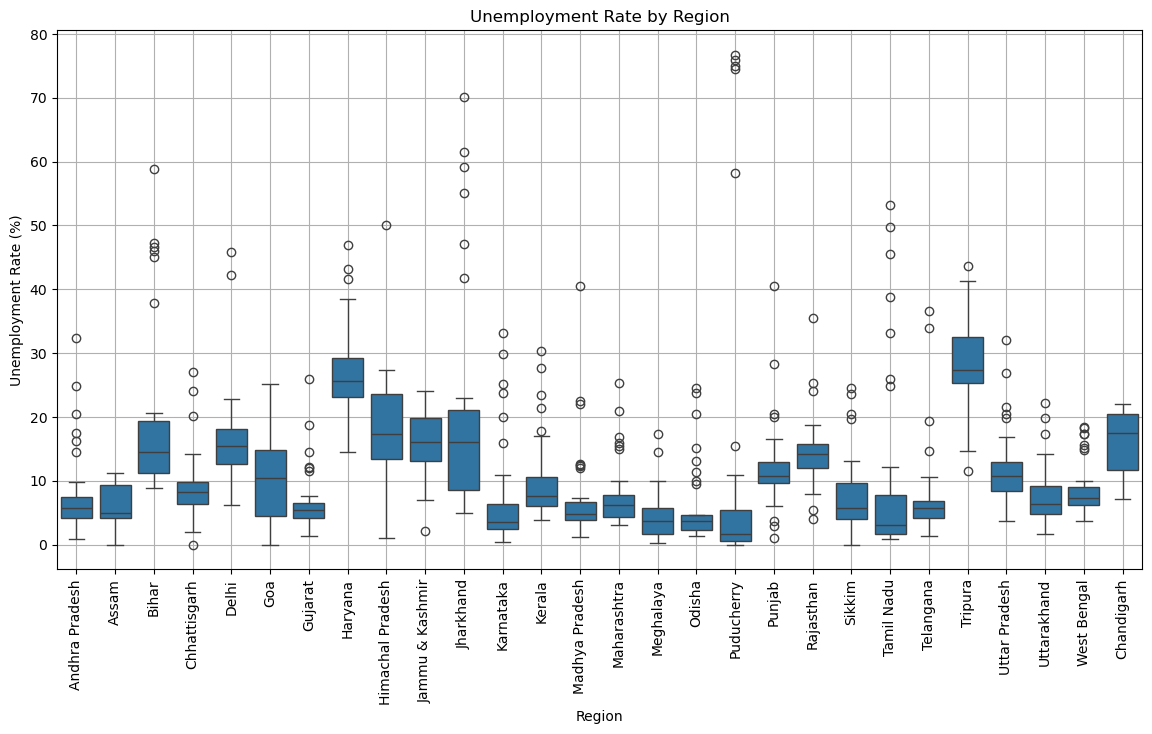

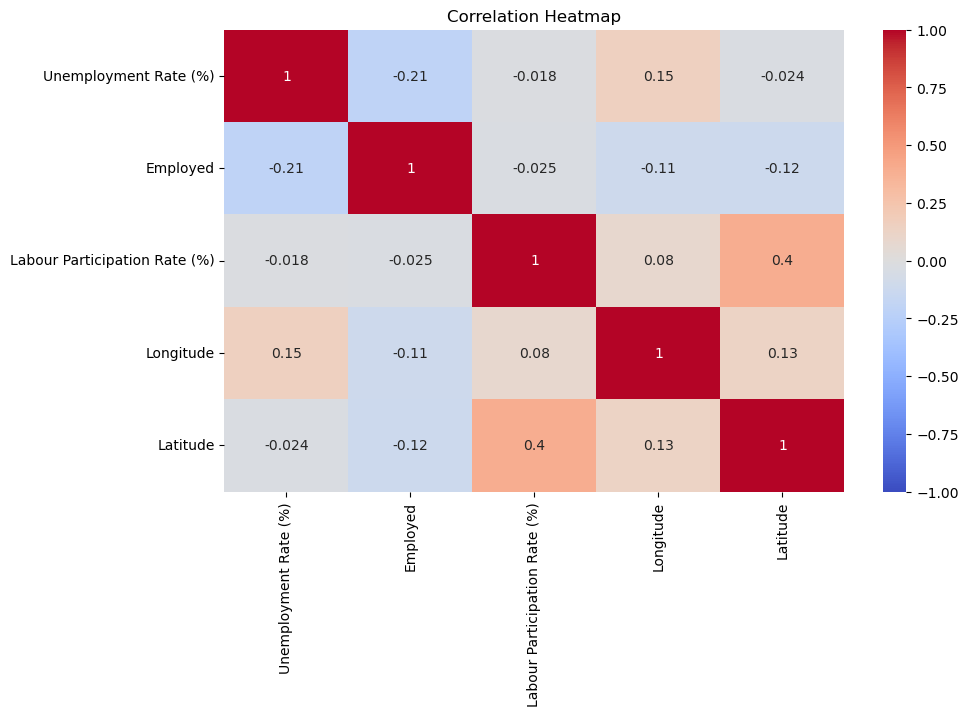

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and read the files
file1 = 'Unemployment in India.xlsx'
file2 = 'Unemployment_Rate_upto_11_2020.xlsx'
df1 = pd.read_excel(file1)
df2 = pd.read_excel(file2)

# Clean the datasets and rename columns to avoid duplication and merge based on common columns
df1.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate (%)',
                    'Estimated Employed': 'Employed',
                    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'}, inplace=True)

df2.rename(columns={'Estimated Unemployment Rate (%)': 'Unemployment Rate (%)',
                    'Estimated Employed': 'Employed',
                    'Estimated Labour Participation Rate (%)': 'Labour Participation Rate (%)'}, inplace=True)

# Merge datasets on common columns
df = pd.concat([df1, df2], ignore_index=True)

# Drop any duplicate columns that may have been created during the merge
df = df.loc[:, ~df.columns.duplicated()]

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

# Drop rows with missing 'Date' values as they are crucial for time series analysis
df.dropna(subset=['Date'], inplace=True)

# Fill missing values with forward fill
df.ffill(inplace=True)

# Data Visualization
# Plotting the unemployment rate over time
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Unemployment Rate (%)', hue='Region')
plt.title('Unemployment Rate in India Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate (%)')
plt.legend(title='Region', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the unemployment rate by region
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='Region', y='Unemployment Rate (%)')
plt.title('Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

# Correlation heatmap
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()